In [ ]:
#Step 1: Data Preparation and Exploration

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy.stats as stats

# Ensure inline plotting
%matplotlib inline

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# Load the dataset
data = pd.read_csv('day.csv')

# Display the first few rows of the dataset
print(data.head())

# Convert 'season' and 'weathersit' to categorical string values
data['season'] = data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
data['weathersit'] = data['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})

# Convert 'season' and 'weathersit' to categorical variables
data['season'] = data['season'].astype('category')
data['weathersit'] = data['weathersit'].astype('category')

# Create dummy variables for categorical features
data = pd.get_dummies(data, drop_first=True)

# Display the first few rows of the modified dataset
print(data.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant  yr  mnth  holi

In [ ]:
#Step 2: Exploratory Data Analysis

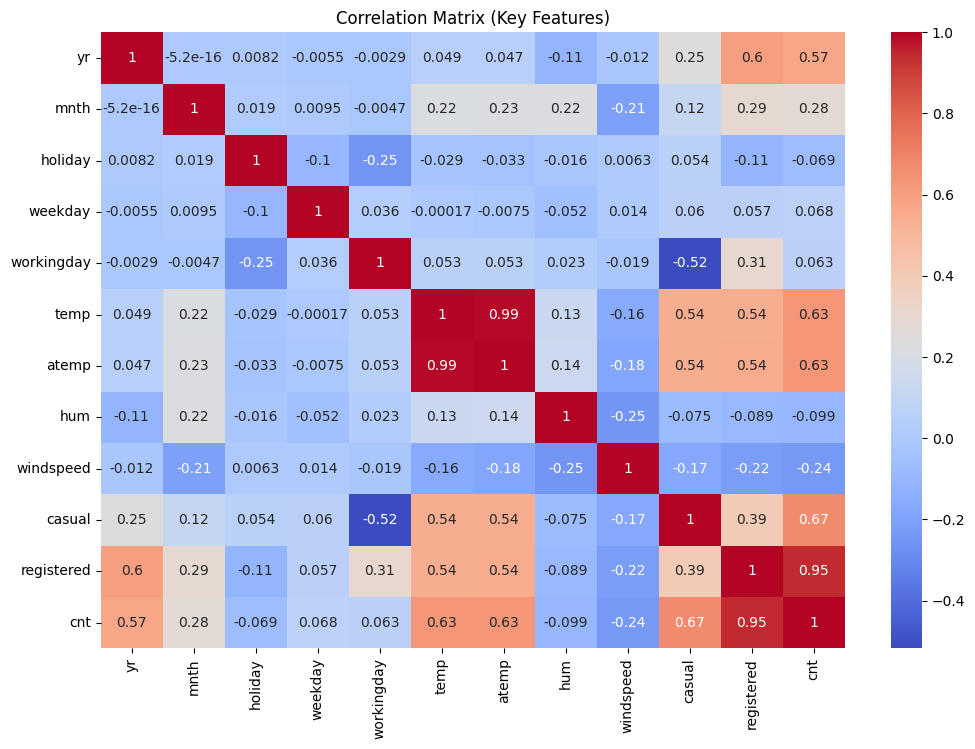

In [3]:
# Select a subset of key features for correlation matrix visualization
key_features = ['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Create a correlation matrix for the subset of key features
correlation_matrix = data[key_features].corr()

# Visualize the correlation matrix for the subset
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Key Features)')
plt.show()


In [ ]:
#Step 3: Model Building

In [8]:
# Display the columns of the dataset
print(data.columns)

# Adjust the columns to drop based on the available columns
columns_to_drop = ['cnt', 'casual', 'registered']  # Removed 'dteday' since it's not present

# Split the data into training and test sets
X = data.drop(columns=columns_to_drop)
y = data['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


Index(['instant', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed',
       ...
       'dteday_31-08-2019', 'dteday_31-10-2018', 'dteday_31-10-2019',
       'dteday_31-12-2018', 'dteday_31-12-2019', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object', length=747)


In [ ]:
#Step 4: Model Evaluation

R-squared on the test set: 0.8164636641575378


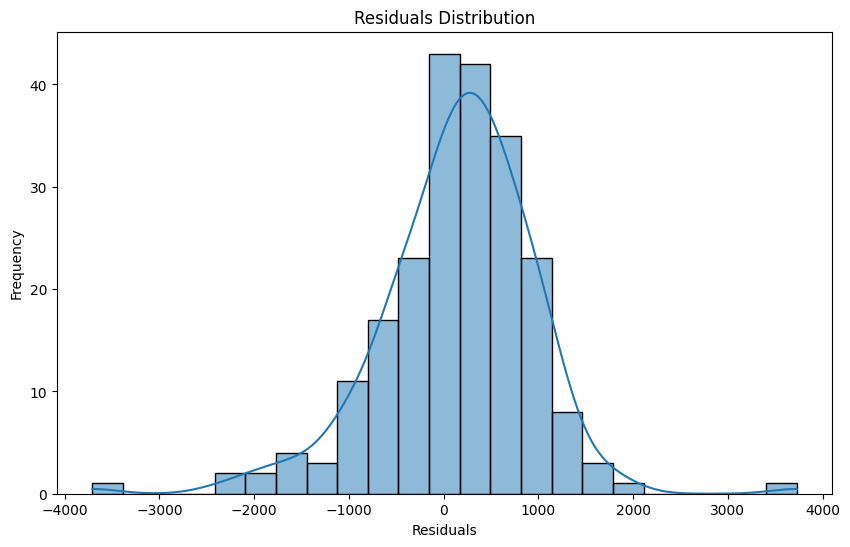

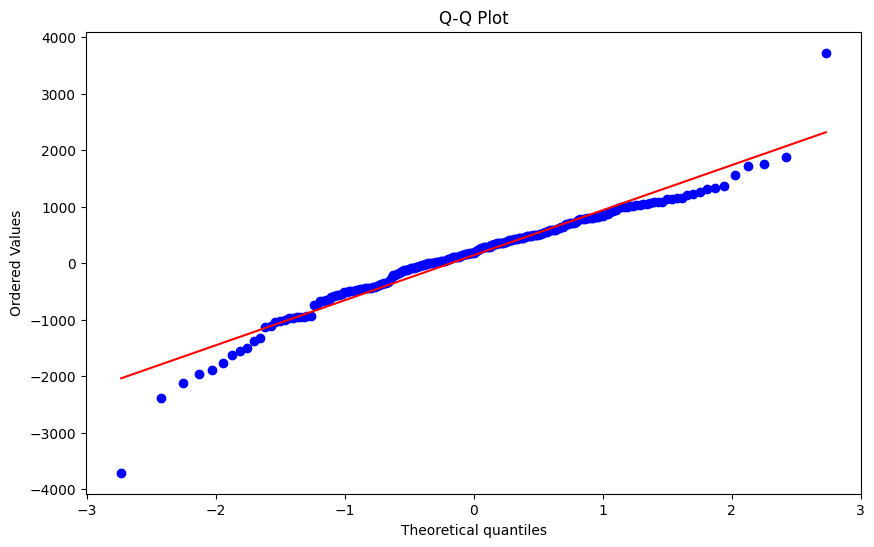

In [9]:
# Evaluate the model using R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared on the test set: {r2}')

# Residual analysis
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot for normality check
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()
